In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import shapely.wkt
import contextily as ctx
import seaborn as sns
import matplotlib.patches as pt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
ph_gdf = gpd.read_file('Shapefiles/Final Philippine Data.shp')
ph_gdf = ph_gdf.drop(['distance', 'highway_no'], axis = 1)
ph_gdf['Urban Density'] = ph_gdf['Urban Tile']/ph_gdf.area

In [3]:
highway_arr = np.log10(ph_gdf['highway_di'].to_numpy())
water_arr = np.log10(ph_gdf['coastal_di'].to_numpy())

highway_norm = highway_arr/np.median(highway_arr)
water_norm = water_arr/np.median(water_arr)

ph_gdf['highway_norm'] = highway_norm
ph_gdf['water_norm'] = water_norm
#ph_gdf['highway*water'] = np.dot(highway_norm.T,water_norm)

In [5]:
b = urban_arr[np.isfinite(urban_arr)]/np.median(urban_arr)

NameError: name 'urban_arr' is not defined

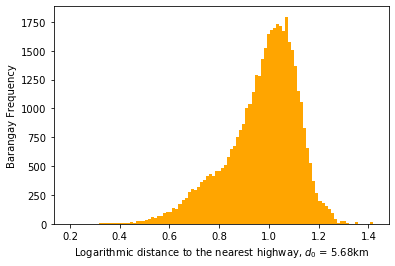

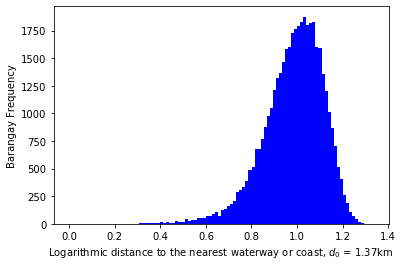

NameError: name 'urban' is not defined

In [4]:
d0_highway = (10**np.median(highway_arr))/1000
d0_waterway = (10**np.median(water_arr))/1000
plt.hist(highway_norm, bins = 100, color = 'Orange')
plt.ylabel('Barangay Frequency')
plt.xlabel(r'Logarithmic distance to the nearest highway, $d_0$ = ' + '{:01.2f}'.format(d0_highway) + "km")
plt.show()
plt.hist(water_norm, bins = 100, color='Blue')
plt.ylabel('Barangay Frequency')
plt.xlabel(r'Logarithmic distance to the nearest waterway or coast, $d_0$ = ' + '{:01.2f}'.format(d0_waterway) + "km")
plt.show()
plt.hist(urban['highway_norm'], bins = 100, color='Red')
plt.ylabel('Barangay Frequency')
plt.xlabel(r'Logarithmic distance to the nearest waterway or coast, $d_0$ = ' + '{:01.4f}'.format(d0_highway) + "km")
plt.show()

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        7.000e+00, 6.000e+00, 8.000e+00, 7.000e+00, 1.100e+01, 1.200e+01,
        1.200e+01, 7.000e+00, 1.400e+01, 2.700e+01, 2.600e+01, 2.000e+01,
        2.800e+01, 2.500e+01, 3.800e+01, 3.500e+01, 4.000e+01, 5.000e+01,
        5.600e+01, 6.500e+01, 9.100e+01, 1.100e+02, 1.130e+02, 1.130e+02,
        1.460e+02, 1.430e+02, 1.540e+02, 1.960e+02, 1.910e+02, 2.150e+02,
        2.630e+02, 3.040e+02, 3.750e+02, 4.150e+02, 4.960e+02, 5.570e+02,
        6.360e+02, 7.010e+02, 8.200e+02, 8.560e+02, 1.010e+03, 1.069e+03,
        1.134e+03, 1.275e+03, 1.328e+03, 1.468e+03, 1.462e+03, 1.508e+03,
        1.522e+03, 1.546e+03, 1.480e+03, 1.578e+03, 1.461e+03, 1.324e+03,
        1.306e+03, 1.130e+03, 1.009e+03, 8.200e+02, 7.010e+02, 5.380e+02,
        4.400e+02, 3.130e+02, 2.110e+0

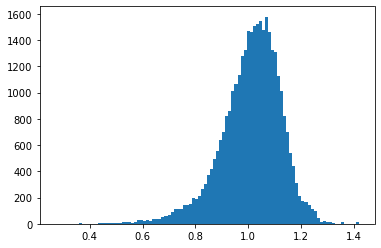

In [5]:
plt.hist(ph_gdf[ph_gdf['Urban Tile'] == 0]['highway_norm'], bins = 100)

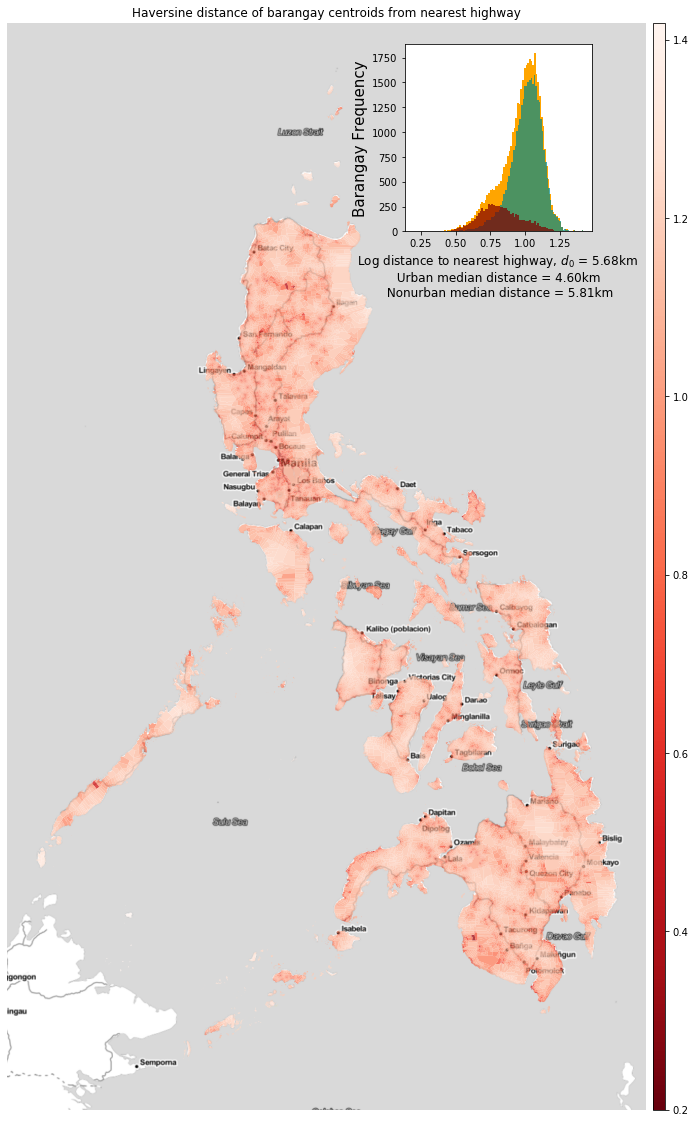

In [12]:
fig, ax = plt.subplots(1, figsize = [20,20])
plt.xlabel("Longitude in degrees")
plt.ylabel("Latitude in degrees")
plt.title("Haversine distance of barangay centroids from nearest highway")
ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
ph_gdf.plot(column = 'highway_norm', cmap = 'Reds_r', legend = True, ax=ax, alpha = 0.8, cax=cax, vmin = 0.2)
ctx.add_basemap(ax, url = ctx.sources.ST_TONER_LITE, crs='epsg:4326')

left, bottom, width, height = [0.56, 0.735, 0.13, 0.13]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.hist(highway_norm, bins = 100, color = 'Orange')
ax2.hist(nonurban['highway_norm'], color = 'darkcyan', bins = 100, alpha = 0.7)
ax2.hist(urban['highway_norm'], bins = 100, color = 'maroon',alpha = 0.7)
ax2.set_ylabel('Barangay Frequency')
ax2.yaxis.label.set_size(15)
ax2.set_xlabel(r'Log distance to nearest highway, $d_0$ = ' + '{:01.2f}'.format(d0_highway) + "km \n Urban median distance = " 
               + '{:01.2f}'.format(np.median(urban['highway_norm'])*d0_highway) + "km \n Nonurban median distance = " 
               + '{:01.2f}'.format(np.median(nonurban['highway_norm'])*d0_highway) + "km")
ax2.xaxis.label.set_size(12)
plt.savefig('SPP2020/Highway Distance.png', dpi=300,bbox_inches='tight')

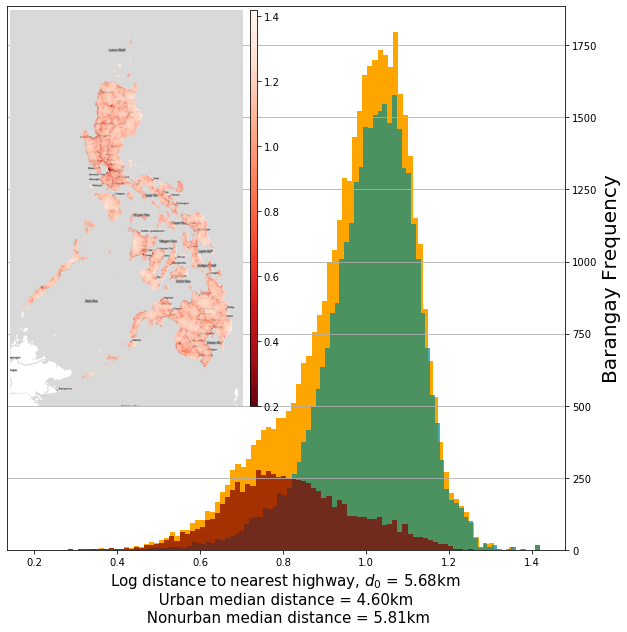

In [36]:
fig, ax = plt.subplots(1, figsize = [10,10])
ax.hist(highway_norm, bins = 100, color = 'Orange')
ax.hist(nonurban['highway_norm'], color = 'darkcyan', bins = 100, alpha = 0.7)
ax.hist(urban['highway_norm'], bins = 100, color = 'maroon',alpha = 0.7)
ax.set_ylabel('Barangay Frequency')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.label.set_size(20)
ax.set_xlabel(r'Log distance to nearest highway, $d_0$ = ' + '{:01.2f}'.format(d0_highway) + "km \n Urban median distance = " 
               + '{:01.2f}'.format(np.median(urban['highway_norm'])*d0_highway) + "km \n Nonurban median distance = " 
               + '{:01.2f}'.format(np.median(nonurban['highway_norm'])*d0_highway) + "km")
ax.xaxis.label.set_size(15)
ax.grid(axis='y')

left, bottom, width, height = [0.05, 0.325, 0.5, 0.55]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlabel("Longitude in degrees")
ax2.set_ylabel("Latitude in degrees")
ax2.axis('off')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.1)
ph_gdf.plot(column = 'highway_norm', cmap = 'Reds_r', legend = True, ax=ax2, alpha = 1, cax=cax, vmin = 0.2)
ctx.add_basemap(ax2, url = ctx.sources.ST_TONER_LITE, crs='epsg:4326')
plt.savefig('SPP2020/Highway Distance.png', dpi=300,bbox_inches='tight')

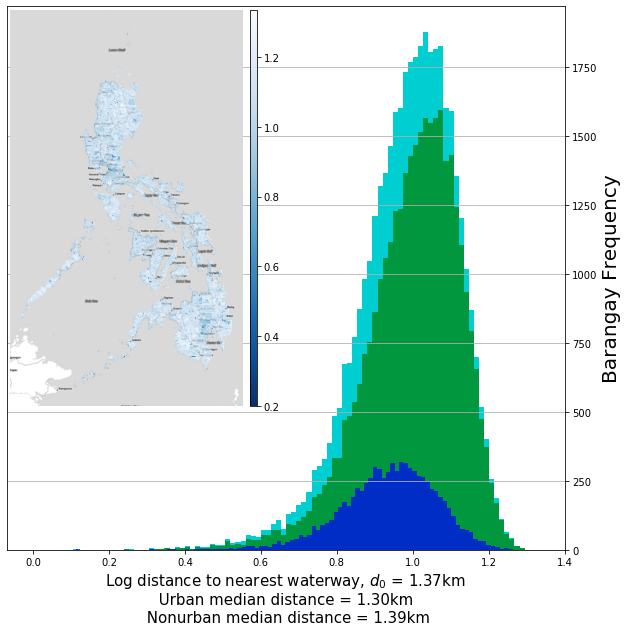

In [41]:
fig, ax = plt.subplots(1, figsize = [10,10])
ax.hist(water_norm, bins = 100, color = 'darkturquoise')
ax.hist(nonurban['water_norm'], color = 'Green', bins = 100, alpha = 0.7)
ax.hist(urban['water_norm'], bins = 100, color = 'Blue',alpha = 0.7)
ax.set_ylabel('Barangay Frequency')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.label.set_size(20)
ax.set_xlabel(r'Log distance to nearest waterway, $d_0$ = ' + '{:01.2f}'.format(d0_waterway) + "km \n Urban median distance = " 
               + '{:01.2f}'.format(np.median(urban['water_norm'])*d0_waterway) + "km \n Nonurban median distance = " 
               + '{:01.2f}'.format(np.median(nonurban['water_norm'])*d0_waterway) + "km")
ax.xaxis.label.set_size(15)
ax.grid(axis='y')

left, bottom, width, height = [0.05, 0.325, 0.5, 0.55]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlabel("Longitude in degrees")
ax2.set_ylabel("Latitude in degrees")
ax2.axis('off')
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.1)
ph_gdf.plot(column = 'water_norm', cmap = 'Blues_r', legend = True, ax=ax2, alpha = 1, cax=cax, vmin = 0.2)
ctx.add_basemap(ax2, url = ctx.sources.ST_TONER_LITE, crs='epsg:4326')
plt.savefig('SPP2020/Waterway Distance.png', dpi=300,bbox_inches='tight')

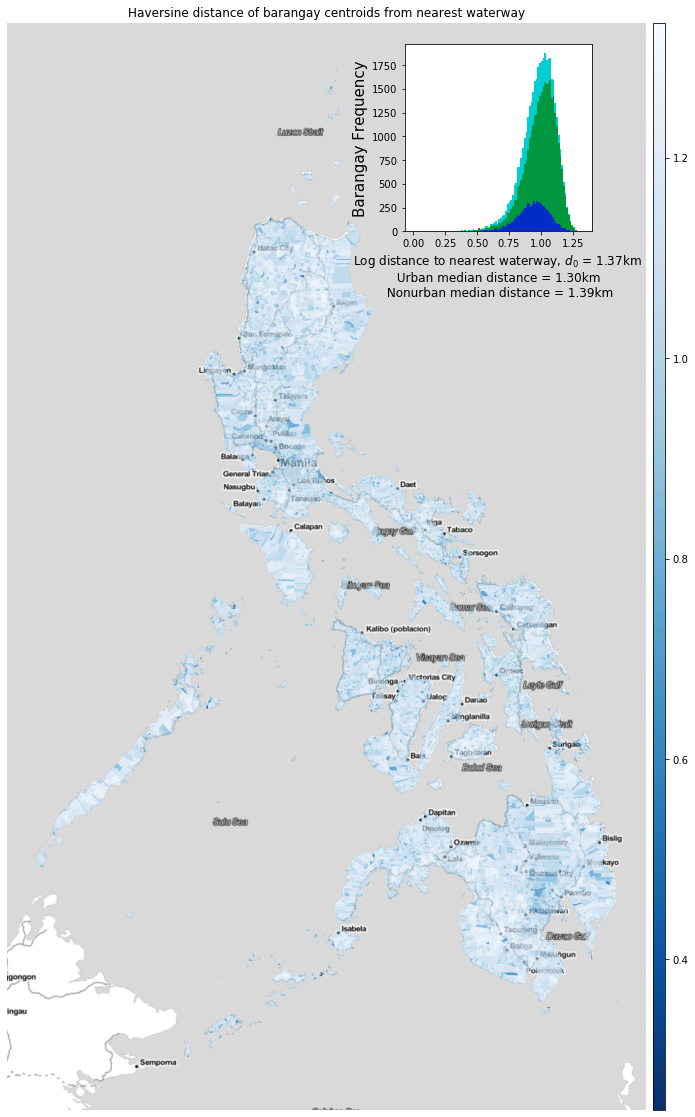

In [14]:
fig, ax = plt.subplots(1, figsize = [20,20])
plt.xlabel("Longitude in degrees")
plt.ylabel("Latitude in degrees")
plt.title("Haversine distance of barangay centroids from nearest waterway")
ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
ph_gdf.plot(column = 'water_norm', cmap = 'Blues_r', legend = True, ax=ax, alpha = 0.8, cax=cax, vmin = 0.25)
ctx.add_basemap(ax, url = ctx.sources.ST_TONER_LITE, crs='epsg:4326')

left, bottom, width, height = [0.56, 0.735, 0.13, 0.13]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.hist(water_norm, bins = 100, color = 'darkturquoise')
ax2.hist(nonurban['water_norm'], color = 'Green', bins = 100, alpha = 0.7)
ax2.hist(urban['water_norm'], bins = 100, color = 'Blue', alpha = 0.7)
ax2.set_ylabel('Barangay Frequency')
ax2.yaxis.label.set_size(15)
ax2.set_xlabel(r'Log distance to nearest waterway, $d_0$ = ' + '{:01.2f}'.format(d0_waterway) + "km \n Urban median distance = " 
               + '{:01.2f}'.format(np.median(urban['water_norm'])*d0_waterway) + "km \n Nonurban median distance = " 
               + '{:01.2f}'.format(np.median(nonurban['water_norm'])*d0_waterway) + "km")
ax2.xaxis.label.set_size(12)
plt.savefig('SPP2020/Waterway Distance.png', dpi=300,bbox_inches='tight')

In [702]:
wn_rescaled = water_norm/water_norm.max()

In [723]:
histw,bins = np.histogram(water_norm, bins = 100)#, color = 'darkturquoise')
histnu,bins = np.histogram(nonurban['water_norm'], bins = 100)#, alpha = 0.7)
histu,bins = np.histogram(urban['water_norm'], bins = 100)#, alpha = 0.7)

In [724]:
w_norm = histw/histw.max()
nu_norm = histnu/histnu.max()
u_norm = histu/histu.max()

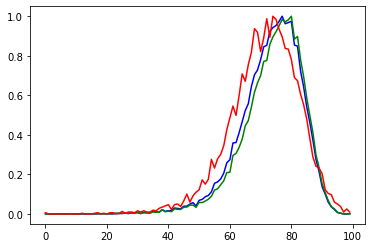

In [725]:
plt.plot(w_norm, color = 'blue')
plt.plot(nu_norm, color = 'green')
plt.plot(u_norm, color = 'red')

## Disregard zero urban areas

/home/cdiaz/.conda-envs/geospatial/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cdiaz/.conda-envs/geospatial/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/cdiaz/.conda-envs/geospatial/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  1.,   1.,   1.,   1.,   6.,   7.,   5.,   7.,  15.,  25.,  30.,
         31.,  58.,  69., 104., 142., 174., 194., 241., 253., 276., 294.,
        325., 302., 307., 343., 335., 359., 362., 489., 517., 485., 404.,
        380., 334., 296., 246., 213., 145., 122.,  43.,  23.,  18.,   0.,
          1.,   1.,   1.,   2.,   0.,   1.]),
 array([1.87348671, 1.97811552, 2.08274434, 2.18737315, 2.29200197,
        2.39663078, 2.5012596 , 2.60588841, 2.71051722, 2.81514604,
        2.91977485, 3.02440367, 3.12903248, 3.2336613 , 3.33829011,
        3.44291892, 3.54754774, 3.65217655, 3.75680537, 3.86143418,
        3.966063  , 4.07069181, 4.17532062, 4.27994944, 4.38457825,
        4.48920707, 4.59383588, 4.6984647 , 4.80309351, 4.90772232,
        5.01235114, 5.11697995, 5.22160877, 5.32623758, 5.4308664 ,
        5.53549521, 5.64012403, 5.74475284, 5.84938165, 5.95401047,
        6.05863928, 6.1632681 , 6.26789691, 6.37252573, 6.47715454,
        6.58178335, 6.68641217, 6.79104098, 6.

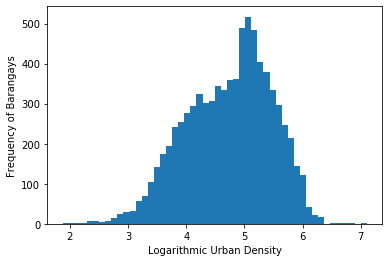

In [7]:
ph_gdf['urban_log'] = np.log10(ph_gdf['Urban Density']).replace(-np.inf, np.nan).dropna()
plt.ylabel('Frequency of Barangays')
plt.xlabel('Logarithmic Urban Density')
plt.hist(ph_gdf['urban_log'], bins = 50)

In [8]:
urban = ph_gdf[ph_gdf['urban_log'].notna()]
nonurban = ph_gdf[ph_gdf['Urban Tile'] == 0]
nanvalues = ph_gdf[ph_gdf['Urban Tile'].isna()]

In [9]:
ph_gdf[ph_gdf['Urban Tile'].isna()].area.max()

1.6233352652295216e-05

In [10]:
len(nanvalues)

66

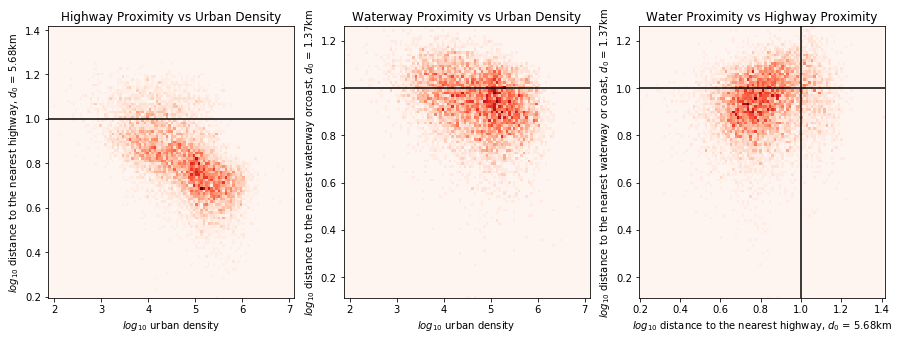

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [15,5])

ax1.hist2d(urban['urban_log'], urban['highway_norm'], bins = 100, cmap = 'Reds')
ax1.set_title('Highway Proximity vs Urban Density')
ax1.hlines(1,-10,10)
ax1.vlines(1,-10,10)
ax1.set_ylabel(r'$log_{10}$ distance to the nearest highway, $d_0$ = ' + '{:01.2f}'.format(d0_highway) + "km")
ax1.set_xlabel(r'$log_{10}$ urban density')

ax2.hist2d(urban['urban_log'], urban['water_norm'], bins = 100, cmap = 'Reds')
ax2.set_title('Waterway Proximity vs Urban Density')
ax2.hlines(1,-10,10)
ax2.vlines(1,-10,10)
ax2.set_ylabel(r'$log_{10}$ distance to the nearest waterway orcoast, $d_0$ = ' + '{:01.2f}'.format(d0_waterway) + "km")
ax2.set_xlabel(r'$log_{10}$ urban density')

ax3.hist2d(urban['highway_norm'], urban['water_norm'], bins = 100, cmap = "Reds")
ax3.set_title('Water Proximity vs Highway Proximity')
ax3.hlines(1,-10,10)
ax3.vlines(1,-10,10)
ax3.set_xlabel(r'$log_{10}$ distance to the nearest highway, $d_0$ = ' + '{:01.2f}'.format(d0_highway) + "km")
ax3.set_ylabel(r'$log_{10}$ distance to the nearest waterway or coast, $d_0$ = ' + '{:01.2f}'.format(d0_waterway) + "km")

plt.savefig('SPP2020/Transportation Urban Co-occurrence.png', dpi = 300, bbox_inches = 'tight')

## Include non-urban areas

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   2.,   1.,  10.,   8.,  14.,  29.,  42.,  70., 115.,
        188., 246., 314., 366., 430., 451., 453., 480., 492., 531., 707.,
        745., 583., 526., 427., 347., 218., 133.,  39.,  15.,   1.,   1.,
          3.,   0.,   1.,   0.,   0.]),
 array([0.01      , 0.16285714, 0.31571429, 0.46857143, 0.62142857,
        0.77428571, 0.92714286, 1.08      , 1.23285714, 1.38571429,
        1.53857143, 1.69142857, 1.84428571, 1.99714286, 2.15      ,
        2.30285714, 2.45571429, 2.60857143, 2.76142857, 2.91428571,
        3.06714286, 3.22      , 3.37285714, 3.52571429, 3.67857143,
        3.83142857, 3.98428571, 4.13714286, 4.29      , 4.44285714,
        4.59571429, 4.74857143, 4.90142857, 5.05428571, 5.20714286,
        5.36      , 5.51285714, 5.66571429, 5.81857143, 5.97142857,
        6.12428571, 6.27714286, 6.43      , 6.58285714, 6.73571429,
        6.88857143, 7.04142857, 7.19428571, 7.347142

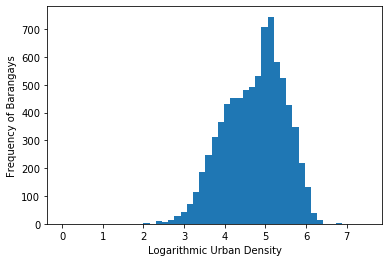

In [234]:
ph_gdf['urban_log'] = np.log10(ph_gdf['Urban Density']).replace([-np.inf, np.nan], 0)#.dropna()
plt.ylabel('Frequency of Barangays')
plt.xlabel('Logarithmic Urban Density')
plt.hist(ph_gdf['urban_log'], bins = np.linspace(0.01,7.5,50))

Text(0, 0.5, 'Logarithmic distance to the nearest waterway or coast, $d_0$ = 1.37km')

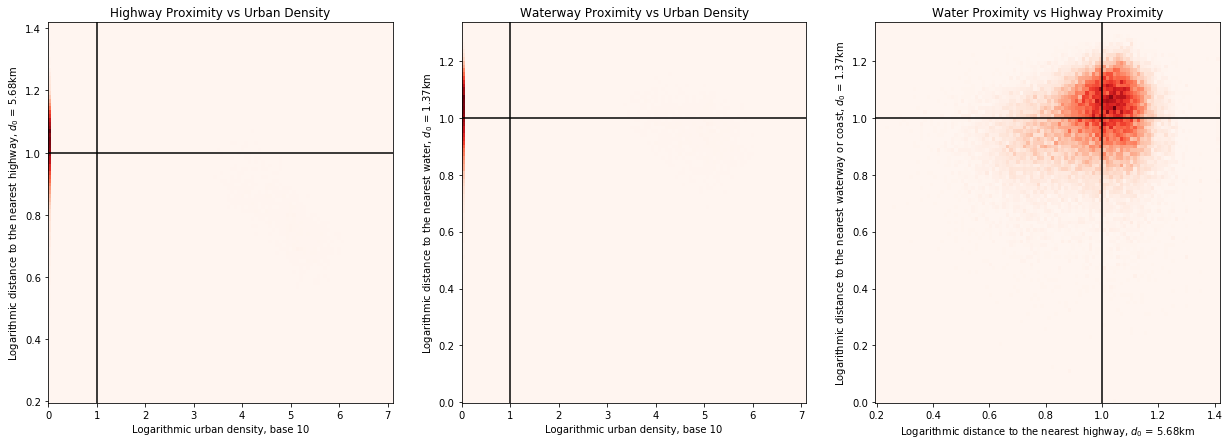

In [250]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = [21,7])

ax1.hist2d(ph_gdf['urban_log'], ph_gdf['highway_norm'], bins = 100, cmap = 'Reds')
ax1.set_title('Highway Proximity vs Urban Density')
ax1.hlines(1,-10,10)
ax1.vlines(1,-10,10)
ax1.set_ylabel(r'Logarithmic distance to the nearest highway, $d_0$ = ' + '{:01.2f}'.format(d0_highway) + "km")
ax1.set_xlabel('Logarithmic urban density, base 10')

ax2.hist2d(ph_gdf['urban_log'], ph_gdf['water_norm'], bins = 100, cmap = 'Reds')
ax2.set_title('Waterway Proximity vs Urban Density')
ax2.hlines(1,-10,10)
ax2.vlines(1,-10,10)
ax2.set_ylabel(r'Logarithmic distance to the nearest water, $d_0$ = ' + '{:01.2f}'.format(d0_waterway) + "km")
ax2.set_xlabel('Logarithmic urban density, base 10')

ax3.hist2d(ph_gdf['highway_norm'], ph_gdf['water_norm'], bins = 100, cmap = "Reds")
ax3.set_title('Water Proximity vs Highway Proximity')
ax3.hlines(1,-10,10)
ax3.vlines(1,-10,10)
ax3.set_xlabel(r'Logarithmic distance to the nearest highway, $d_0$ = ' + '{:01.2f}'.format(d0_highway) + "km")
ax3.set_ylabel(r'Logarithmic distance to the nearest waterway or coast, $d_0$ = ' + '{:01.2f}'.format(d0_waterway) + "km")

In [42]:
ds = ph_gdf['urban_log']

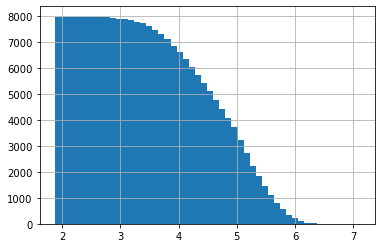

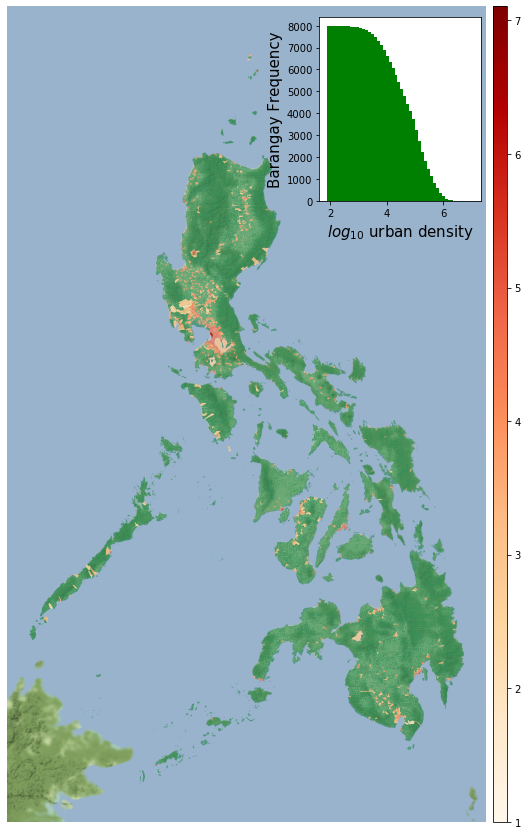

In [66]:
fig, ax = plt.subplots(1, 1, figsize = [15,15])
#plt.xlabel("Longitude in degrees")
#plt.ylabel("Latitude in degrees")
#plt.title(r"Urban Density in $log_{10}$")
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
ph_gdf.plot(column = 'urban_log', cmap = "OrRd", legend = True, missing_kwds= dict(color = "seagreen"), cax=cax, vmin = 1, ax=ax, alpha = 0.8)
ctx.add_basemap(ax, url = ctx.sources.ST_TERRAIN_BACKGROUND, crs='epsg:4326')

left, bottom, width, height = [0.57, 0.7, 0.15, 0.17]
ax2 = fig.add_axes([left, bottom, width, height])
ds.hist(cumulative = -1, bins = 50, color = 'Green', ax=ax2, grid=False)
ax2.set_ylabel('Barangay Frequency')
ax2.yaxis.label.set_size(15)
ax2.set_xlabel(r'$log_{10}$ urban density')
ax2.xaxis.label.set_size(15)

plt.savefig('SPP2020/Urban Density.png', dpi = 300, bbox_inches = 'tight')

## Correlation Plot of transportation proximity to urban tile density

In [52]:
#https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y, size):
    fig, ax = plt.subplots(figsize = [9,4])
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 4800
    
    #plot_grid = plt.GridSpec(1, 3, hspace=0.2, wspace=0.2) # Setup a 1x15 grid
    ax = plt.subplot(121)#plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=corr['value'].apply(value_to_color), # Vector of square color values, mapped to color palette #Fixed by using dataframe of correlation values
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(['HP', 'UD', 'WP'], horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(['HP', 'UD', 'WP'])
    
    ax.grid(False, 'major')
    ax.grid(False, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
    plt.title('Correlation of transportation proximity to urban density')
    
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="3%", pad=0.1)
    
    
    ax = plt.subplot(122)#plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[0.01]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(0, 0.1) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    #ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 
    plt.savefig('SPP2020/Transportation Urban Correlation.png', dpi = 300, bbox_inches = 'tight')

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

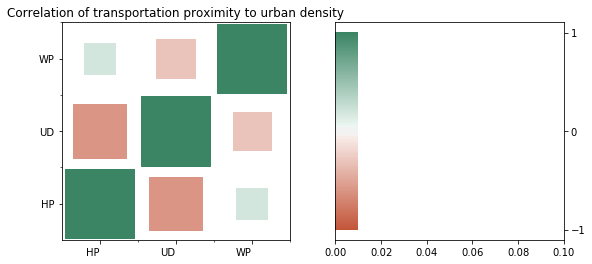

In [53]:
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 150, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
color = np.arange(0,256)

data = urban
columns = ['urban_log', 'highway_norm', 'water_norm'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(x=corr['x'], y=corr['y'], size=corr['value'].abs())

In [93]:
data = urban
columns = ['urban_log', 'highway_norm', 'water_norm'] 
corr = data[columns].corr()

In [107]:
corr.columns = ['UD', 'HP', 'WP']
corr.index = ['UD', 'HP', 'WP']

In [127]:
corr

,UD,HP,WP
UD,1.000000,-0.597564,-0.307356
HP,-0.597564,1.000000,0.197288
WP,-0.307356,0.197288,1.000000


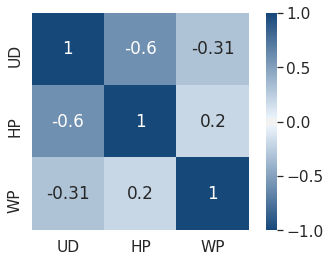

In [129]:
fig,ax = plt.subplots()
#plt.setp(ax.yaxis.get_majorticklabels(), va='center')
sns.set(font_scale = 1.4)
cmap = sns.diverging_palette(h_neg=250, h_pos=250, s=90, l=30, as_cmap=True)
sns.heatmap(corr, cmap = cmap, vmin = -1, vmax = 1, square = True, annot = True, ax=ax)
#plt.title('Transportation Proximity - Urban Density correlation')
plt.savefig('SPP2020/Transportation Urban Correlation.png', dpi = 300, bbox_inches = 'tight')

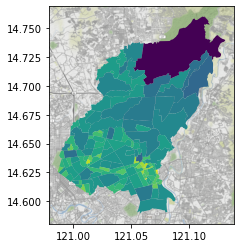

In [79]:
fig,ax = plt.subplots(1)
urban[urban['NAME_2'] == 'Quezon City'].plot(column = 'urban_log', ax=ax)
ctx.add_basemap(ax, url = ctx.sources.ST_TERRAIN, crs='epsg:4326')

In [371]:
corr['value']**2

0    1.000000
1    0.357083
2    0.094467
3    0.357083
4    1.000000
5    0.038923
6    0.094467
7    0.038923
8    1.000000
Name: value, dtype: float64

In [372]:
corr['x'] == urban_lo

,x,y,value
0,urban_log,urban_log,1.000000
1,highway_norm,urban_log,-0.597564
2,water_norm,urban_log,-0.307356
3,urban_log,highway_norm,-0.597564
4,highway_norm,highway_norm,1.000000
5,water_norm,highway_norm,0.197288
6,urban_log,water_norm,-0.307356
7,highway_norm,water_norm,0.197288
8,water_norm,water_norm,1.000000


In [607]:
letters = ['a', 'b', 'c']

In [608]:
letters.index('a')

0

In [605]:
np.where(letters == 'a')

(array([0]),)

In [17]:
corr

,x,y,value
0,urban_log,urban_log,1.000000
1,highway_norm,urban_log,-0.597564
2,water_norm,urban_log,-0.307356
3,urban_log,highway_norm,-0.597564
4,highway_norm,highway_norm,1.000000
5,water_norm,highway_norm,0.197288
6,urban_log,water_norm,-0.307356
7,highway_norm,water_norm,0.197288
8,water_norm,water_norm,1.000000


In [403]:
ph_gdf[ph_gdf['NAME_3'] == 'Calumpit']

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,...,PROVINCE,REGION,coastal_di,Urban Tile,highway_di,geometry,Urban Density,highway_norm,water_norm,urban_log
28584,177,PHL,Philippines,12,Batangas,167,Lobo,3830,Calumpit,None,...,Batangas,CALABARZON (Region IV-A),2268.991069,0.0,6783.660424,"POLYGON ((121.23686 13.71247, 121.23961 13.707...",0.0,1.020471,1.070051,NaN


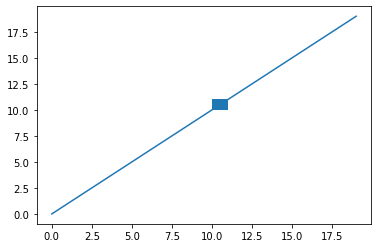

In [520]:

rect = pt.Rectangle((10,10), 1* corr['value'][0], 1* corr['value'][0])

ax.add_patch(rect)


In [18]:
urban

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,...,PROVINCE,REGION,coastal_di,Urban Tile,highway_di,geometry,Urban Density,highway_norm,water_norm,urban_log
98,177,PHL,Philippines,80,Zamboanga del Norte,1578,Dapitan City,40115,Bagting,None,...,Zamboanga del Norte,Zamboanga Peninsula (Region IX),226.818240,2.0,187.361563,"POLYGON ((123.42136 8.66454, 123.42186 8.66342...",112357.477939,0.605305,0.751139,5.050602
100,177,PHL,Philippines,80,Zamboanga del Norte,1578,Dapitan City,40117,Banonong,None,...,Zamboanga del Norte,Zamboanga Peninsula (Region IX),1007.192803,1.0,571.514093,"POLYGON ((123.42335 8.65065, 123.42422 8.65018...",8005.094636,0.734305,0.957582,3.903366
106,177,PHL,Philippines,80,Zamboanga del Norte,1578,Dapitan City,40123,Cawa-Cawa,None,...,Zamboanga del Norte,Zamboanga Peninsula (Region IX),67.655742,2.0,376.866343,"POLYGON ((123.42747 8.66405, 123.42920 8.66198...",80017.951473,0.686141,0.583616,4.903187
109,177,PHL,Philippines,80,Zamboanga del Norte,1578,Dapitan City,40126,Dawo,None,...,Zamboanga del Norte,Zamboanga Peninsula (Region IX),262.712865,2.0,441.162124,"POLYGON ((123.41798 8.65378, 123.42436 8.65488...",19556.129603,0.704361,0.771483,4.291283
116,177,PHL,Philippines,80,Zamboanga del Norte,1578,Dapitan City,40133,Linabo,None,...,Zamboanga del Norte,Zamboanga Peninsula (Region IX),56.857705,2.0,761.923842,"POLYGON ((123.42947 8.66052, 123.43000 8.65831...",91480.712856,0.767567,0.559537,4.961330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41753,177,PHL,Philippines,78,Tawi-Tawi,1551,Bongao,39659,Tubig Tanah,None,...,Tawi-Tawi,Autonomous Region of Muslim Mindanao (ARMM),136.003705,2.0,3421.488917,"POLYGON ((119.75511 5.01363, 119.77252 5.01678...",25797.073096,0.941301,0.680310,4.411570
41798,177,PHL,Philippines,78,Tawi-Tawi,1551,Bongao,39632,Lamion,None,...,Tawi-Tawi,Autonomous Region of Muslim Mindanao (ARMM),666.494252,6.0,3198.149293,"POLYGON ((119.75654 5.02501, 119.76443 5.02542...",67916.736285,0.933493,0.900404,4.831977
41809,177,PHL,Philippines,78,Tawi-Tawi,1551,Bongao,39643,Pag-Asa,None,...,Tawi-Tawi,Autonomous Region of Muslim Mindanao (ARMM),796.380243,5.0,3228.021510,"POLYGON ((119.77834 5.02364, 119.77695 5.02222...",70018.460974,0.934569,0.925060,4.845213
41833,177,PHL,Philippines,78,Tawi-Tawi,1553,Mapun,39688,Lupa Pula,None,...,Tawi-Tawi,Autonomous Region of Muslim Mindanao (ARMM),584.006577,1.0,210759.137852,"MULTIPOLYGON (((118.47799 6.96805, 118.47847 6...",1381.633328,1.417935,0.882108,3.140393


In [617]:
idx = corr[((corr['x'] == 'urban_log') &  (corr['y'] == 'highway_norm'))].index

In [631]:
sns.heatmap()

['urban_log', 'highway_norm', 'water_norm']
['urban_log', 'highway_norm', 'water_norm']


In [78]:
urban_area = np.sum(urban.area)
nonurban_area = np.sum(nonurban.area)

In [79]:
urban_area/nonurban_area

0.07924176734881108

In [ ]:
#matplotlib.rcParamas.update